# Proyek Analisis Data: E-Commerce
- **Nama:** [Samuel Nathanael Sitompul]
- **Email:** [sitompulsamuel625@gmail.com]
- **ID Dicoding:** [snssamuel]

## Menentukan Pertanyaan Bisnis

- Produk mana yang paling sering dibeli pelanggan?
- Wilayah mana yang mencatat jumlah transaksi paling tinggi sehingga dapat menjadi target pemasaran utama?
- Barang apa yang memiliki rating terbaik dan terburuk dalam sebuah E-commerce ini?
- Seller mana yang mencatat jumlah transaksi paling banyak dan apakah rating memengaruhi jumlah transaksi yang ada?
- Pembelian menggunakan metode apa yang digunakan pada transaksi yang sudah berhasil dilakukan?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster
from google.colab import drive

## Data Wrangling

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Gathering Data

In [3]:
customer_dataset_df = pd.read_csv(
    "https://drive.google.com/uc?id=1H5qva8hWtMk0v4-lKItIpAfJ8wHIwCc3"
)
customer_dataset_df.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP


In [4]:
geolocation_dataset_df = pd.read_csv(
    "https://drive.google.com/uc?id=19LPGbXcSnd5NFEupJ4_AC1qgZ4JuktKM"
)
geolocation_dataset_df.head(2)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP


In [5]:
order_items_dataset_df = pd.read_csv(
    "https://drive.google.com/uc?id=1kOBaDmODqZeAutXKfsOtVDsK-GXvxArA"
)
order_items_dataset_df.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93


In [6]:
order_payments_dataset_df = pd.read_csv(
    "https://drive.google.com/uc?id=1fzxUBFpCz066woLJLNb_cXafusb3NEJv"
)
order_payments_dataset_df.head(2)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39


In [7]:
order_reviews_dataset_df = pd.read_csv(
    "https://drive.google.com/uc?id=1CkIoPYxlz9SQ3YxFEZuo2OXtM63GSqfx"
)
order_reviews_dataset_df.head(2)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13


In [8]:
order_dataset_df = pd.read_csv(
    "https://drive.google.com/uc?id=1lgzEV1_8IUmI6sFw7pJ6-T1ZjWtixCdD"
)
order_dataset_df.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00


In [9]:
products_dataset_df = pd.read_csv(
    "https://drive.google.com/uc?id=1UPz25mWjEAQkAKyOxTp1algOxG6qfB-b"
)
products_dataset_df.head(2)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0


In [10]:
product_category_name_translation_df = pd.read_csv(
    "https://drive.google.com/uc?id=1dMFMX6iATmv9x0pDLXYjoB5NyifAXP3-"
)
product_category_name_translation_df.head(2)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories


In [11]:
sellers_dataset_df = pd.read_csv(
    "https://drive.google.com/uc?id=1VXZSpIPo6n7XHWg5fI1uex__8gXW5PHg"
)
sellers_dataset_df.head(2)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP


In [12]:

product_df = pd.merge(
    products_dataset_df[['product_id', 'product_category_name']],
    product_category_name_translation_df,
    on='product_category_name',
    how='inner'
)

product_order_df = pd.merge(
    order_items_dataset_df[['order_id', 'product_id', 'seller_id', 'price', 'freight_value']],
    product_df[['product_id', 'product_category_name_english']],
    on='product_id',
    how='inner'
)

product_seller_df = pd.merge(
    product_order_df,
    sellers_dataset_df[['seller_id', 'seller_city', 'seller_state']],
    on='seller_id',
    how='inner'
)

customer_order_df = pd.merge(
    order_dataset_df[['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp']],
    customer_dataset_df[['customer_id', 'customer_city', 'customer_state']],
    on='customer_id',
    how='inner'
)

customer_geo_df = pd.merge(
    customer_dataset_df[['customer_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state']],
    geolocation_dataset_df.groupby('geolocation_zip_code_prefix')[['geolocation_lat', 'geolocation_lng']].mean().reset_index(),
    left_on='customer_zip_code_prefix',
    right_on='geolocation_zip_code_prefix',
    how='inner'
)


payment_method_df = pd.merge(
    order_dataset_df[['order_id', 'customer_id', 'order_status']],
    order_payments_dataset_df[['order_id', 'payment_type']],
    on='order_id',
    how='inner'
)
all_df = (
    customer_order_df
    .merge(
        product_order_df[['order_id', 'product_category_name_english', 'seller_id', 'price']],
        on='order_id',
        how='inner'
    )
    .merge(order_payments_dataset_df[['order_id', 'payment_type']], on='order_id', how='inner')
    .merge(order_reviews_dataset_df[['order_id', 'review_score']], on='order_id', how='inner')
)

all_df = all_df.merge(
    customer_geo_df[['customer_id', 'geolocation_lat', 'geolocation_lng']],
    on='customer_id',
    how='inner'
)

all_df = all_df[[
    'order_id',
    'customer_id',
    'customer_city',
    'customer_state',
    'order_purchase_timestamp',
    'product_category_name_english',
    'seller_id',
    'price',
    'review_score',
    'payment_type',
    'geolocation_lat',
    'geolocation_lng'
]]

**Insight:**
- Terdapat 10 tabel utama dalam kasus E-commerce ini
- Terdapat 5 kategori utama yang ingin disampaikan dalam dataset ini yaitu: Customer, Order, Product, Seller, Location

### Assessing Data

In [66]:
geolocation_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 738332 entries, 0 to 1000161
Data columns (total 5 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   geolocation_zip_code_prefix  738332 non-null  int64  
 1   geolocation_lat              738332 non-null  float64
 2   geolocation_lng              738332 non-null  float64
 3   geolocation_city             738332 non-null  object 
 4   geolocation_state            738332 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 33.8+ MB


In [13]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115299 entries, 0 to 115298
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       115299 non-null  object 
 1   customer_id                    115299 non-null  object 
 2   customer_city                  115299 non-null  object 
 3   customer_state                 115299 non-null  object 
 4   order_purchase_timestamp       115299 non-null  object 
 5   product_category_name_english  115299 non-null  object 
 6   seller_id                      115299 non-null  object 
 7   price                          115299 non-null  float64
 8   review_score                   115299 non-null  int64  
 9   payment_type                   115299 non-null  object 
 10  geolocation_lat                115299 non-null  float64
 11  geolocation_lng                115299 non-null  float64
dtypes: float64(3), int64(1), objec

order_purchase_timestamp masih bersifat objek bukan date

In [14]:
all_df.duplicated().sum()

np.int64(14013)

masih banyak data duplikat

In [15]:
all_df.describe()

,price,review_score,geolocation_lat,geolocation_lng
count,115299.000000,115299.000000,115299.000000,115299.000000
mean,120.605991,4.034372,-21.234484,-46.196654
std,182.692025,1.385574,5.563683,4.043692
min,0.850000,1.000000,-33.689948,-72.668881
25%,39.900000,4.000000,-23.590298,-48.104959
50%,74.900000,5.000000,-22.928999,-46.631777
75%,134.900000,5.000000,-20.182732,-43.622642
max,6735.000000,5.000000,42.184003,-8.723762


**Insight:**
- Terdapat banyak data yang terduplikasi pada tabel all_df
- Tipe data date masih tidak sesuai karena masih bersifat objek

### Cleaning Data

Cleaning all_df

In [16]:
datetime_column = ['order_purchase_timestamp']
for column in datetime_column:
  all_df[column] = pd.to_datetime(all_df[column]) #mengganti tipe data menjadi datetime


In [17]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115299 entries, 0 to 115298
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       115299 non-null  object        
 1   customer_id                    115299 non-null  object        
 2   customer_city                  115299 non-null  object        
 3   customer_state                 115299 non-null  object        
 4   order_purchase_timestamp       115299 non-null  datetime64[ns]
 5   product_category_name_english  115299 non-null  object        
 6   seller_id                      115299 non-null  object        
 7   price                          115299 non-null  float64       
 8   review_score                   115299 non-null  int64         
 9   payment_type                   115299 non-null  object        
 10  geolocation_lat                115299 non-null  float64       
 11  

In [18]:
all_df.drop_duplicates(inplace=True)

In [19]:
all_df.duplicated().sum()

np.int64(0)

In [20]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101286 entries, 0 to 115298
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       101286 non-null  object        
 1   customer_id                    101286 non-null  object        
 2   customer_city                  101286 non-null  object        
 3   customer_state                 101286 non-null  object        
 4   order_purchase_timestamp       101286 non-null  datetime64[ns]
 5   product_category_name_english  101286 non-null  object        
 6   seller_id                      101286 non-null  object        
 7   price                          101286 non-null  float64       
 8   review_score                   101286 non-null  int64         
 9   payment_type                   101286 non-null  object        
 10  geolocation_lat                101286 non-null  float64       
 11  geolo

## Exploratory Data Analysis (EDA)

- Produk mana yang paling sering dibeli pelanggan?
- Wilayah mana yang mencatat jumlah transaksi paling tinggi sehingga dapat menjadi target pemasaran utama?
- Barang apa yang memiliki rating terbaik dan terburuk dalam sebuah E-commerce ini?
- Seller mana yang mencatat jumlah transaksi paling banyak dan apakah rating memengaruhi jumlah transaksi yang ada?
- Pembelian menggunakan metode apa yang digunakan pada transaksi yang sudah berhasil dilakukan?

In [21]:
all_df.describe()

,order_purchase_timestamp,price,review_score,geolocation_lat,geolocation_lng
count,101286,101286.000000,101286.000000,101286.000000,101286.000000
mean,2018-01-01 08:57:08.948719360,124.704842,4.082075,-21.192804,-46.178306
min,2016-09-04 21:15:19,0.850000,1.000000,-33.689948,-72.668881
25%,2017-09-13 08:12:52.750000128,41.000000,4.000000,-23.589279,-48.104959
50%,2018-01-20 00:20:02.500000,79.000000,5.000000,-22.924015,-46.631084
75%,2018-05-05 21:14:13,139.000000,5.000000,-20.139441,-43.600508
max,2018-09-03 09:06:57,6735.000000,5.000000,42.184003,-8.723762
std,NaN,187.660261,1.347770,5.602070,4.057429


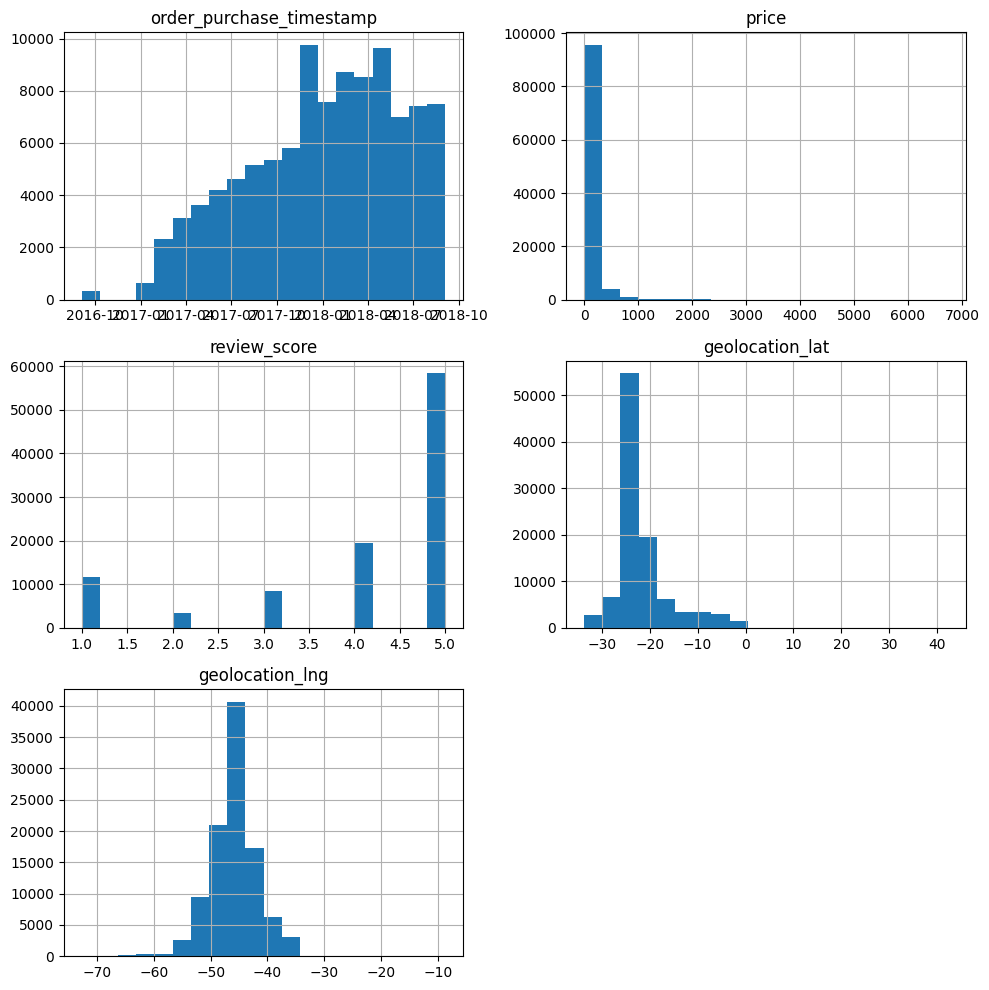

In [22]:
all_df.hist(figsize=(10, 10), bins=20)
plt.tight_layout()
plt.show()

Data menunjukkan peningkatan pesanan yang signifikan dari akhir 2016 hingga mencapai puncaknya pada 2018. Sebagian besar produk memiliki harga di bawah 1000, dengan beberapa produk yang harganya jauh lebih tinggi dari mayoritas. Mayoritas pelanggan memberikan ulasan positif dengan skor 5, sementara sebagian lainnya memberikan skor 1, menunjukkan adanya pengalaman yang kurang memuaskan yang perlu ditangani. Secara keseluruhan, platform ini berkembang pesat dengan tingkat kepuasan pelanggan yang tinggi, namun masih memiliki ruang untuk perbaikan dalam layanan dan kualitas data.

Pertanyaan 1

In [23]:
all_df.groupby('product_category_name_english')['order_id'].nunique().sort_values(ascending=False).reset_index().head(10)

,product_category_name_english,order_id
0,bed_bath_table,9295
1,health_beauty,8741
2,sports_leisure,7653
3,computers_accessories,6632
4,furniture_decor,6382
5,housewares,5833
6,watches_gifts,5554
7,telephony,4156
8,auto,3868
9,toys,3841


Pertanyaan 2

In [24]:
all_df.groupby(by=["customer_city", "customer_state"]).agg({
    "order_id" : "count",
     "geolocation_lat" : 'mean',
     "geolocation_lng" :  'mean'
}).sort_values(by = "order_id", ascending=False).reset_index().head(5)

,customer_city,customer_state,order_id,geolocation_lat,geolocation_lng
0,sao paulo,SP,15862,-23.572032,-46.633088
1,rio de janeiro,RJ,6943,-22.922966,-43.323606
2,belo horizonte,MG,2818,-19.909194,-43.956670
3,brasilia,DF,2009,-15.810838,-47.972712
4,curitiba,PR,1551,-25.453864,-49.274168


Pertanyaan 3

In [25]:
all_df.groupby(by="product_category_name_english")["review_score"].mean().sort_values(ascending=False).reset_index().head(5)

,product_category_name_english,review_score
0,cds_dvds_musicals,4.666667
1,fashion_childrens_clothes,4.500000
2,books_general_interest,4.448669
3,costruction_tools_tools,4.395833
4,flowers,4.392857


In [26]:
all_df.groupby(by="product_category_name_english")["review_score"].mean().sort_values(ascending=True).reset_index().head(5)

,product_category_name_english,review_score
0,security_and_services,2.500000
1,office_furniture,3.599694
2,fashion_male_clothing,3.611570
3,fashio_female_clothing,3.682927
4,diapers_and_hygiene,3.740741


Pertanyaan 4

Seller tidak mendapat bagian dalam freight value

In [27]:
all_df.groupby(by=["seller_id"]).agg({
    "order_id": "count",
    "review_score": "mean"
}).sort_values(by=["order_id","review_score", ], ascending=False).reset_index().head(5)

,seller_id,order_id,review_score
0,6560211a19b47992c3666cc44a7e94c0,1964,3.930754
1,4a3ca9315b744ce9f8e9374361493884,1906,3.833683
2,cc419e0650a3c5ba77189a1882b7556a,1740,4.056897
3,1f50f920176fa81dab994f9023523100,1431,4.127883
4,da8622b14eb17ae2831f4ac5b9dab84a,1399,4.131523


Pertanyaan 5

In [28]:
all_df.groupby(by="payment_type")["order_id"].count().sort_values(ascending=False).reset_index().head(5)

,payment_type,order_id
0,credit_card,76326
1,boleto,19663
2,voucher,3771
3,debit_card,1526


Insight

Saya menggunakan metode group by yang mengelompokan data untuk menghasilkan kesimpulan dari data yang saya akan olah dalam bentuk visualisasi data nantinya

## Visualization & Explanatory Analysis

### Pertanyaan 1

In [29]:
top_products = (
    all_df.groupby('product_category_name_english')['order_id']
    .nunique()
    .sort_values(ascending=False)
    .reset_index()
)
top_products.columns = ['product_category', 'Total Sales']




In [30]:
top_products

,product_category,Total Sales
0,bed_bath_table,9295
1,health_beauty,8741
2,sports_leisure,7653
3,computers_accessories,6632
4,furniture_decor,6382
...,...,...
66,home_comfort_2,23
67,la_cuisine,12
68,cds_dvds_musicals,12
69,fashion_childrens_clothes,8


/tmp/ipython-input-2416765086.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Text(0, 0.5, '')

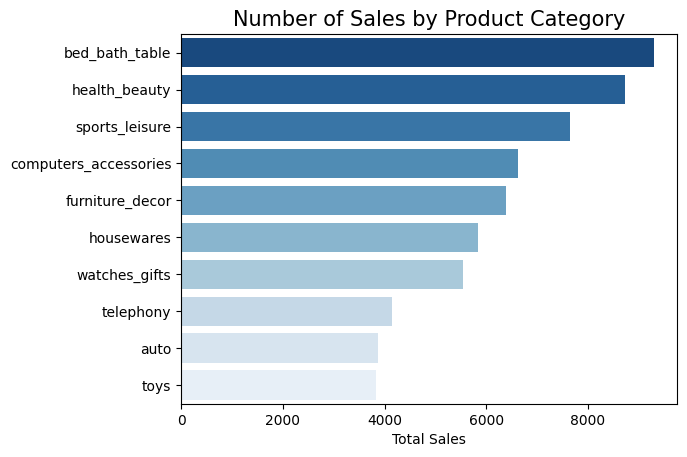

In [31]:
sns.barplot(
    y="product_category",
    x="Total Sales",
    data=top_products.head(10).sort_values(by="Total Sales", ascending=False),
    palette=sns.color_palette("Blues_r", n_colors=10)
)
plt.title("Number of Sales by Product Category", loc="center", fontsize=15)
plt.ylabel(None)

### Pertanyaan 2 (Analisis Geospatial)

In [32]:
Top_Region = all_df.groupby(by=["customer_city", "customer_state"]).agg({
    "order_id" : "count",
     "geolocation_lat" : 'mean',
     "geolocation_lng" :  'mean'
}).sort_values(by = "order_id", ascending=False).reset_index()

Top_Region.columns = ['City', 'State', 'Total Sales', 'Latitude', 'Longitude']


In [33]:
Top_Region.head(5)

,City,State,Total Sales,Latitude,Longitude
0,sao paulo,SP,15862,-23.572032,-46.633088
1,rio de janeiro,RJ,6943,-22.922966,-43.323606
2,belo horizonte,MG,2818,-19.909194,-43.956670
3,brasilia,DF,2009,-15.810838,-47.972712
4,curitiba,PR,1551,-25.453864,-49.274168


In [34]:
map_center = [Top_Region['Latitude'].mean(), Top_Region['Longitude'].mean()]

m = folium.Map(location=map_center, zoom_start=5)

max_sales = Top_Region['Total Sales'].max()

for i, row in Top_Region.head(20).iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=(row['Total Sales'] / max_sales) * 20,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        popup=f"""
        <b>City:</b> {row['City']}<br>
        <b>State:</b> {row['State']}<br>
        <b>Total Sales:</b> {row['Total Sales']}
        """,
        tooltip=f"{row['City'].upper()} - {row['Total Sales']}"
    ).add_to(m)

m


Pertanyaan 3

In [35]:

Top_Product_Review = all_df.groupby(by="product_category_name_english")["review_score"].mean().sort_values(ascending=False).reset_index()

In [36]:
Bad_Product_Review = all_df.groupby(by="product_category_name_english")["review_score"].mean().sort_values(ascending=True).reset_index()

In [37]:
Bad_Product_Review.columns = ['Product Category', 'Review Score']

In [38]:
Bad_Product_Review

,Product Category,Review Score
0,security_and_services,2.500000
1,office_furniture,3.599694
2,fashion_male_clothing,3.611570
3,fashio_female_clothing,3.682927
4,diapers_and_hygiene,3.740741
...,...,...
66,flowers,4.392857
67,costruction_tools_tools,4.395833
68,books_general_interest,4.448669
69,fashion_childrens_clothes,4.500000


In [39]:
Top_Product_Review.columns = ['Product Category', 'Review Score']

/tmp/ipython-input-1970940528.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


(0.0, 5.0)

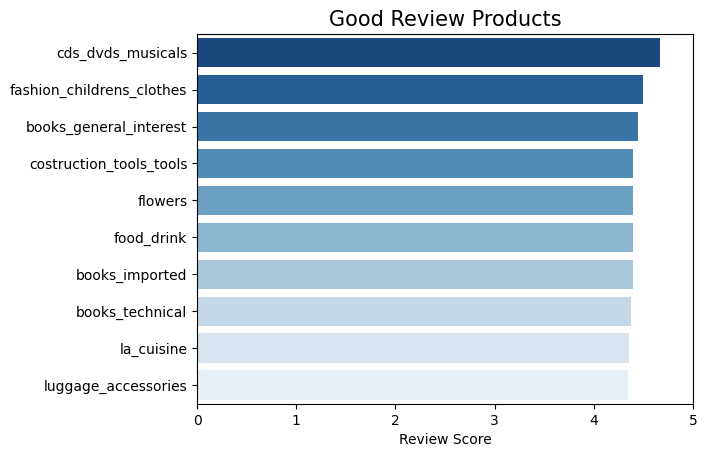

In [40]:
sns.barplot(
    y="Product Category",
    x="Review Score",
    data=Top_Product_Review.head(10).sort_values(by="Review Score", ascending=False),
    palette=sns.color_palette("Blues_r", n_colors=10)
)
plt.title("Good Review Products", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlim(0, 5)


/tmp/ipython-input-3363841718.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Text(0, 0.5, '')

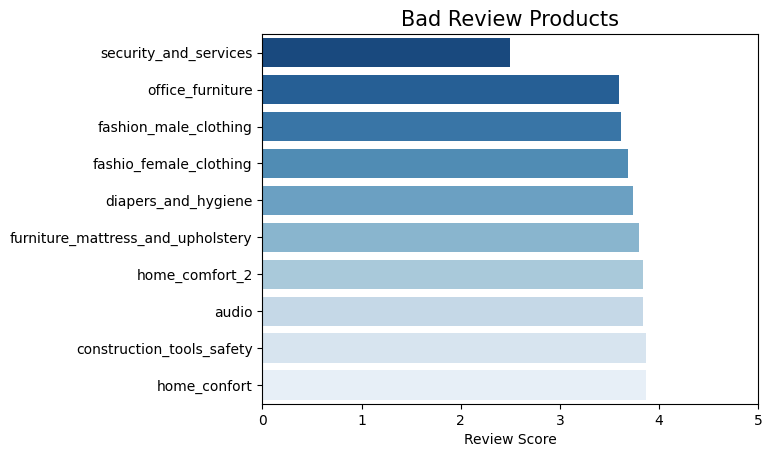

In [41]:
sns.barplot(
    y="Product Category",
    x="Review Score",
    data=Bad_Product_Review.head(10).sort_values(by="Review Score", ascending=True),
    palette=sns.color_palette("Blues_r", n_colors=10)
)
plt.title("Bad Review Products", loc="center", fontsize=15)
plt.xlim(0, 5)
plt.ylabel(None)

/tmp/ipython-input-3945026414.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-3945026414.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


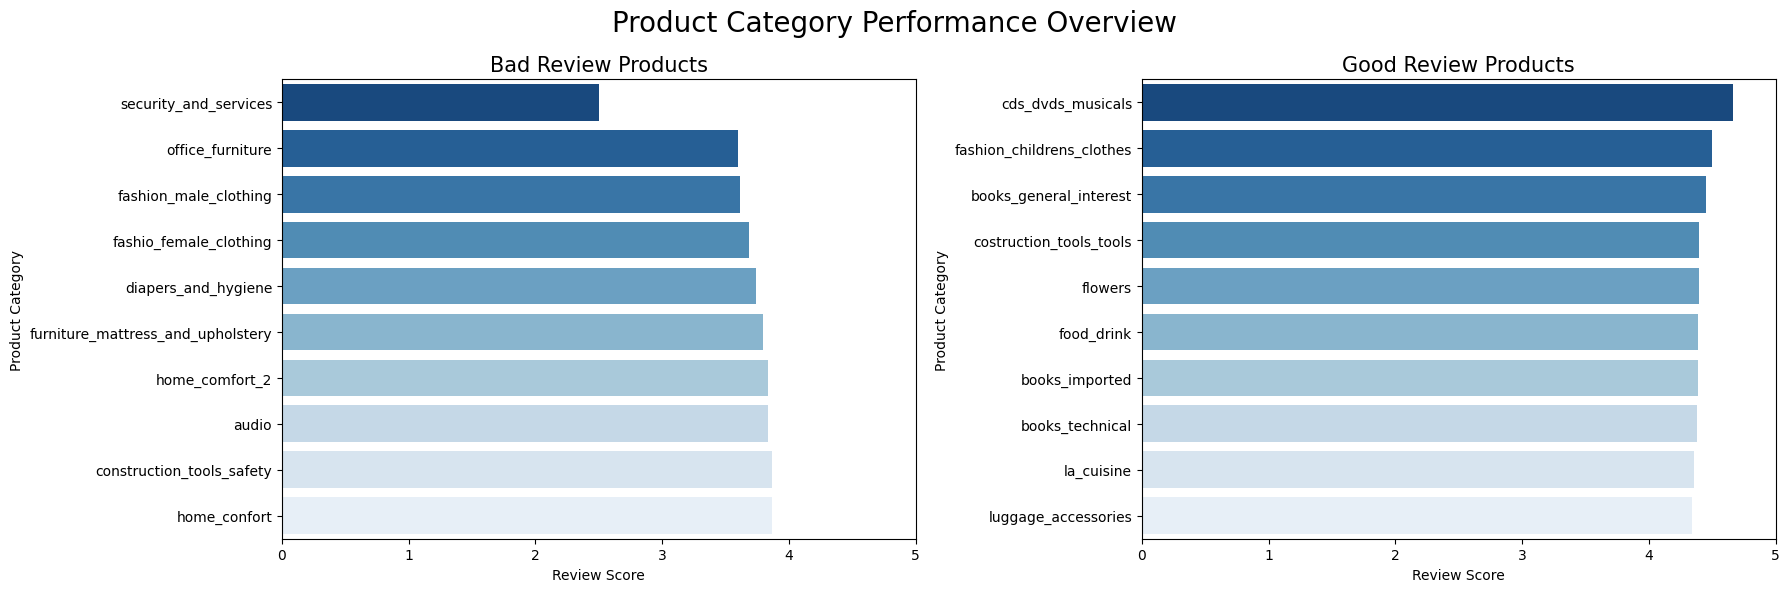

In [42]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

sns.barplot(
    y="Product Category",
    x="Review Score",
    data=Bad_Product_Review.head(10).sort_values(by="Review Score", ascending=True),
    palette=sns.color_palette("Blues_r", n_colors=10),
    ax = ax[0]
)
ax[0].set_title("Bad Review Products", loc="center", fontsize=15)
ax[0].set_xlim(0, 5)

sns.barplot(
    y="Product Category",
    x="Review Score",
    data=Top_Product_Review.head(10).sort_values(by="Review Score", ascending=False),
    palette=sns.color_palette("Blues_r", n_colors=10),
    ax = ax[1]
)
ax[1].set_title("Good Review Products", loc="center", fontsize=15)
ax[1].set_xlim(0, 5)

plt.suptitle("Product Category Performance Overview", fontsize=20)

plt.tight_layout()
plt.show()

Pertanyaan 4

In [43]:
Best_Seller = all_df.groupby(by=["seller_id"]).agg({
    "order_id": "count",
    "review_score": "mean"
}).sort_values(by=["order_id","review_score", ], ascending=False).reset_index()

In [44]:
Best_Seller.columns = ['Seller_id','Total Sales', 'Review Score']

/tmp/ipython-input-3497477840.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Text(0, 0.5, '')

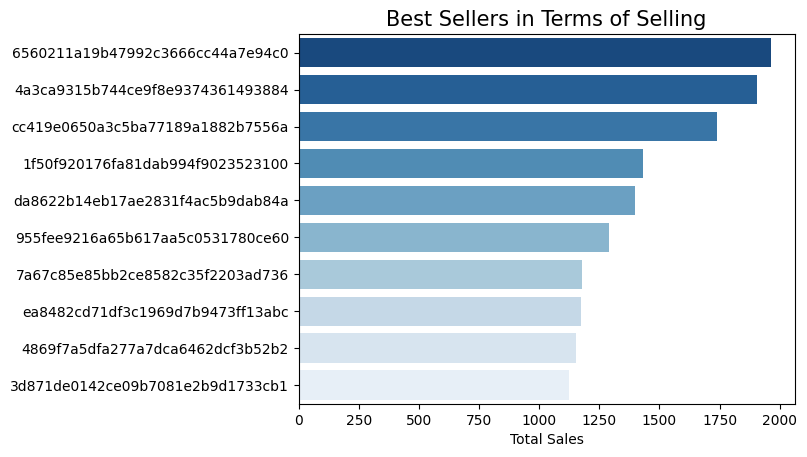

In [45]:
sns.barplot(
    y="Seller_id",
    x="Total Sales",
    data=Best_Seller.head(10).sort_values(by="Total Sales", ascending=False),
    palette=sns.color_palette("Blues_r", n_colors=10)
)
plt.title("Best Sellers in Terms of Selling", loc="center", fontsize=15)
plt.ylabel(None)

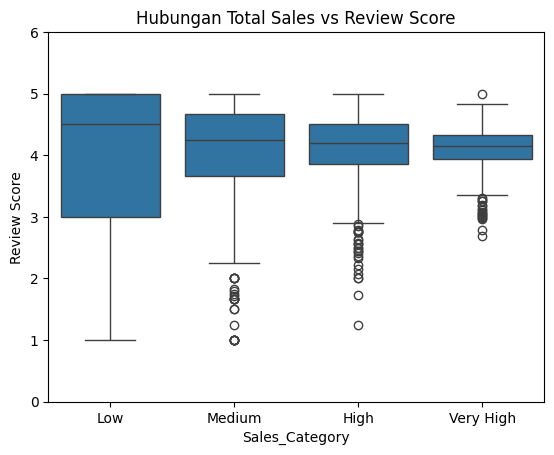

In [46]:
Best_Seller['Sales_Category'] = pd.qcut(Best_Seller['Total Sales'], 4, labels=['Low', 'Medium', 'High', 'Very High'])
sns.boxplot(
    data=Best_Seller,
    x='Sales_Category',
    y='Review Score',
)
plt.ylim(0, Best_Seller['Review Score'].max() + 1)
plt.title("Hubungan Total Sales vs Review Score")
plt.show()

/tmp/ipython-input-1121412947.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


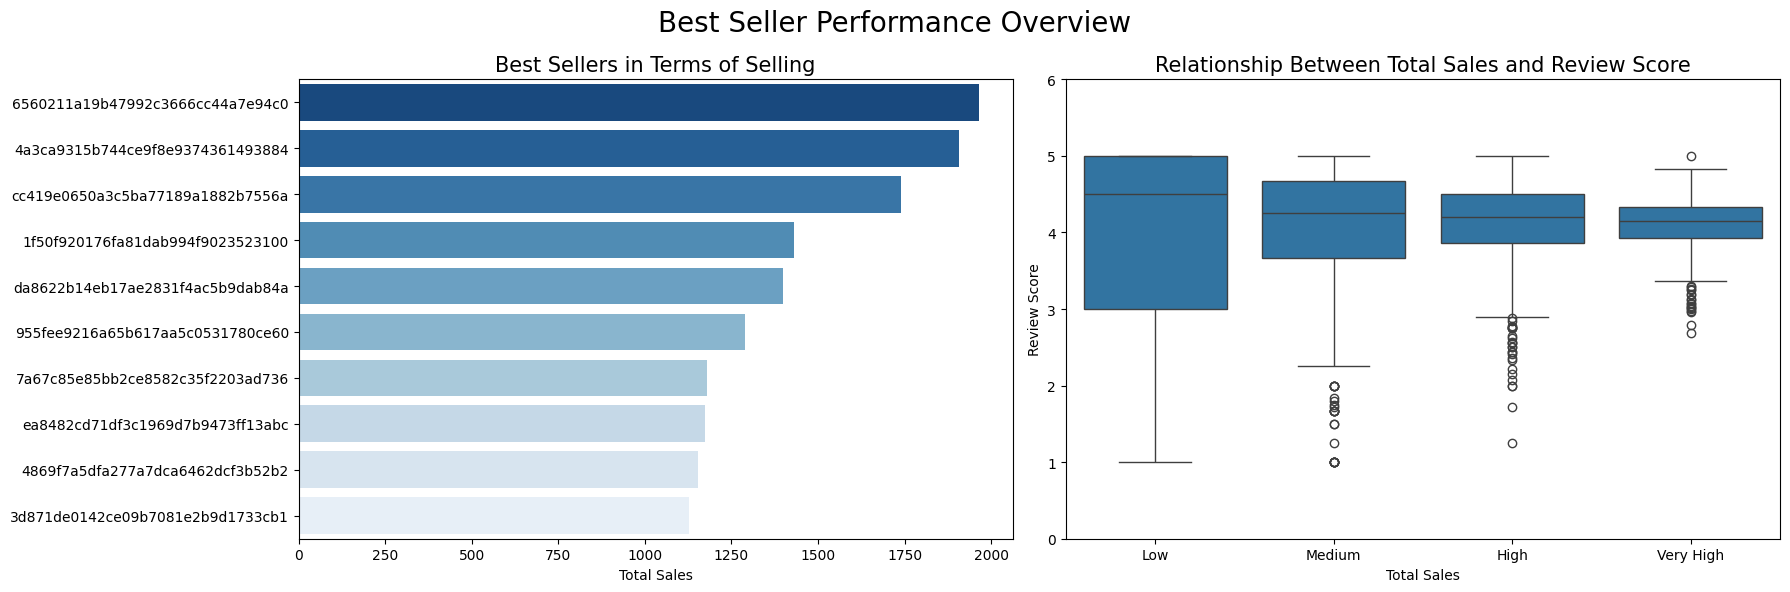

In [47]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

sns.barplot(
    y="Seller_id",
    x="Total Sales",
    data=Best_Seller.head(10).sort_values(by="Total Sales", ascending=False),
    palette=sns.color_palette("Blues_r", n_colors=10),
    ax=ax[0]
)
ax[0].set_title("Best Sellers in Terms of Selling", fontsize=15)
ax[0].set_ylabel(None)
ax[0].set_xlabel("Total Sales")

Best_Seller['Sales_Category'] = pd.qcut(Best_Seller['Total Sales'], 4, labels=['Low', 'Medium', 'High', 'Very High'])

sns.boxplot(
    data=Best_Seller,
    x='Sales_Category',
    y='Review Score',
    ax=ax[1]
)

ax[1].set_ylim(0, Best_Seller['Review Score'].max() + 1)
ax[1].set_title("Relationship Between Total Sales and Review Score", fontsize=15)
ax[1].set_xlabel("Total Sales")
ax[1].set_ylabel("Review Score")

plt.suptitle("Best Seller Performance Overview", fontsize=20)

plt.tight_layout()
plt.show()

Pertanyaan 5

In [48]:
Popular_Payment_Method = all_df.groupby(by="payment_type")["order_id"].count().sort_values(ascending=False).reset_index()

In [49]:
Popular_Payment_Method.columns = ['Payment Type', 'Total Sales']

In [50]:
Popular_Payment_Method['Payment Type'] = Popular_Payment_Method['Payment Type'].replace({
    'credit_card': 'Credit Card',
    'boleto': 'Boleto',
    'voucher': 'Voucher',
    'debit_card': 'Debit Card'
})


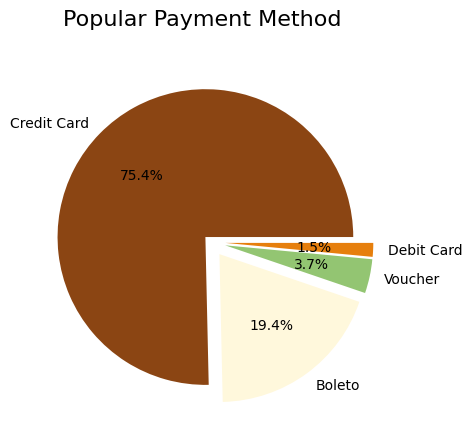

In [51]:
colors = ('#8B4513', '#FFF8DC', '#93C572', '#E67F0D')
explode = [0.05, 0.1, 0.1, 0.1]
plt.pie(
    data = Popular_Payment_Method.head(4),
    x='Total Sales',
    labels='Payment Type',
    autopct='%1.1f%%',
    colors=colors,
    explode=explode,
    textprops={'fontsize': 10}
)
plt.suptitle("Popular Payment Method", fontsize=16)
plt.show()

**Insight:**
- Pada Bar Chart ini terlihat bahwa Kategori Produk yang laku di E-Commerce ini adalah kategori bet_bed_table dengan diikuti health_beauty dan sports_leisure. E-Commerce bisa mengambil langkah untuk membuat strategi baru untuk meningkatkan lagi promosi pada kategori tersebut dan dapat melakukan kerjasama dengan brand penyedia barang tersebut supaya dapat memaksimalkan kembali pendapatan yang ada.
- Pada Map Chart ini terlihat bahwa daerah yang memiliki tingkat pembelian tertinggi memiliki diameter lingkaran yang besar, sehingga dapat terlihat daerah mana yang menggunakan E-Commerce ini secara masif. Perusahaan bisa mengambil langkah dengan menjadikan wilayah yang besar peminatnya sebagai tujuan pasar mereka
- Pada Chart bar yang berisikan produk, terlihat bahwa kategori produk yang memiliki rating tertinggi adalah berkaitan dengan musik, fashion, dan juga buku sejenisnya. Dengan produk terburuk ada di bidang security popok dan juga furniture kantor. Hal ini bisa menjadi petunjuk untuk memperkuat kategori barang yang memiliki review score tertinggi dan dapat segera meninggalkan kategori barang yang memiliki rating rendah
- Pada Chart yang berisikan sales terlihat bahwa terdapat seller yang memiliki penjualan tertinggi pada E-Commerce ini, perusahaan bisa memberikan suatu benefit ataupun reward yang membuat seller menjadi nyaman untuk terus menggunakan platform E-Commerce ini. Chart ini juga melihatkan bahwa semakin tinggi total penjualan suatu produk, semakin stabil dan tinggi pula review score yang diterima. Produk dengan penjualan rendah memiliki review score yang bervariasi, mulai dari sangat buruk hingga sangat baik, menandakan kualitas yang tidak konsisten. Sementara itu, produk dengan penjualan tinggi cenderung memiliki review score yang terkonsentrasi di angka 4 hingga 5, mencerminkan kepuasan pelanggan yang lebih baik dan kualitas produk yang lebih terjaga.
- Pada Pie Chart Payment Method ini terlihat bahwa pelanggan seringkali menggunakan kartu kredit sebagai media utama pembayaran pada E-Commerce ini, perusahaan bisa memanfaatkan ini dengan bekerjasama dengan perusahaan kartu kredit untuk memaksimalkan lagi penggunaan kartu kredit untuk media pembayaran pada perusahaan ini

Analisis Tambahan

KPI CARD

In [52]:
all_df['price'].sum()

np.float64(12630854.64)

In [53]:
all_df['order_id'].count()

np.int64(101286)

In [54]:
all_df['customer_id'].nunique()

96249

In [55]:
all_df['review_score'].mean()

np.float64(4.082074521651561)

In [56]:
all_df['product_category_name_english'].nunique()

71

## Conclusion

1. Produk yang Paling Sering Dibeli Pelanggan

- Kategori produk yang paling sering dibeli adalah bed_bath_table, diikuti oleh health_beauty dan sports_leisure.

- Total transaksi untuk kategori bed_bath_table mencapai 9.295 transaksi, menunjukkan bahwa kategori ini menjadi primadona di platform ini.

- Hal ini menjadi peluang bagi perusahaan untuk memperkuat strategi pemasaran dengan promosi yang lebih agresif pada kategori ini serta menjalin kerja sama dengan supplier utama.

2. Wilayah dengan Jumlah Transaksi Tertinggi

- Dari peta distribusi penjualan, terlihat bahwa wilayah dengan lingkaran terbesar adalah Sau Paulo, yang menunjukkan tingkat transaksi tertinggi.

- Total transaksi dari wilayah ini mencapai 15.862 transaksi.

- Daerah ini dapat dijadikan target utama pemasaran dengan strategi yang lebih fokus, seperti promosi khusus atau program loyalitas pelanggan.

3. Barang dengan Rating Terbaik dan Terburuk

- Rating Tertinggi: Produk dengan kategori musik, fashion, dan buku memiliki rata-rata review score tertinggi, yakni 4.67/5.

- Rating Terendah: Produk kategori security, popok, dan furniture kantor memiliki review score terendah, hanya 2.5/5.

- Perusahaan dapat meningkatkan kualitas produk berkategori rendah atau mempertimbangkan untuk mengurangi stok dari kategori tersebut agar mengurangi risiko ketidakpuasan pelanggan.

4. Performa Seller dan Pengaruh Rating terhadap Penjualan

- Seller dengan jumlah transaksi tertinggi adalah seller dengan id ('6560211a19b47992c3666cc44a7e94c0'), dengan total penjualan sebanyak 2020	kali.

- Semakin tinggi total penjualan suatu produk, semakin stabil dan tinggi pula review score yang diterima. Produk dengan penjualan rendah memiliki review score yang bervariasi, mulai dari sangat buruk hingga sangat baik, menandakan kualitas yang tidak konsisten. Sementara itu, produk dengan penjualan tinggi cenderung memiliki review score yang terkonsentrasi di angka 4 hingga 5

5. Metode Pembayaran yang Paling Sering Digunakan

- Dari analisis pie chart, metode pembayaran kartu kredit mendominasi transaksi dengan persentase sebesar 75.4% dari total pembayaran.

- Diikuti oleh metode lain seperti boleto (19.4%) dan voucher (3.7%).

- Ini menunjukkan peluang bagi perusahaan untuk bekerja sama dengan penyedia kartu kredit, misalnya dengan program cicilan 0% atau diskon eksklusif, sehingga mendorong lebih banyak transaksi.

In [57]:
all_df.to_csv('all_df10.csv', index=False)